In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import pandas as pd

In [6]:
# 통합_정보.csv 파일 로드
output_path = r'통합_정보.csv'
merged_info = pd.read_csv(output_path, encoding='euc-kr')

import re

# 숫자만 추출하는 함수
def extract_year(year):
    numbers = re.findall(r'\d+', str(year))  # 모든 숫자 추출
    return int(numbers[0]) if numbers else None  # 첫 번째 숫자(서기 연도)만 반환

# 적용
merged_info['출판년도'] = pd.to_numeric(merged_info['출판년도'].apply(extract_year))

merged_info['마지막대출일자'] = pd.to_datetime(merged_info['마지막대출일자'], errors='coerce')
#merged_info['출판년도'] = merged_info['출판년도'].astype(int)


/var/folders/2g/9_1xks7j21j8_vjr52g7g8hr0000gn/T/ipykernel_42948/559106370.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_info['마지막대출일자'] = pd.to_datetime(merged_info['마지막대출일자'], errors='coerce')


In [7]:
merged_info.head()

,도서ID,등록일자,수서방법,분류코드,ISBN,서명,저자,출판사,출판년도,소장위치,마지막대출일자,총대출수
0,SS_270312,2017-09-13,학과신청,194,9.78202E+12,Le courage de la verite :le gouvernement de so...,"Foucault, Michel",Gallimard,2009.0,4층인문,NaT,0
1,SS_233793,2008-10-13,수서정보없음,160,9.789E+12,김나지움 논리학입문,"Hegel, Georg Wilhelm Friedrich",용의숲,2008.0,보존서고,2018-11-26 15:48:04,4
2,SS_233788,2008-10-13,수서정보없음,160,9.789E+12,김나지움 논리학입문,"Hegel, Georg Wilhelm Friedrich",용의숲,2008.0,4층인문,2022-08-23 16:48:14,1
3,SS_075978,2010-09-09,이용자희망,160,9.78898E+12,선제논리를 향하여,김영정,철학과현실사,2010.0,4층인문,NaT,0
4,SS_297286,2011-06-22,사서선정,160,9.78898E+12,선제논리를 향하여,김영정,철학과현실사,2010.0,보존서고,NaT,0


In [8]:
# MacOS일 경우
plt.rcParams['font.family'] = 'AppleGothic'

# Windows일 경우
# plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

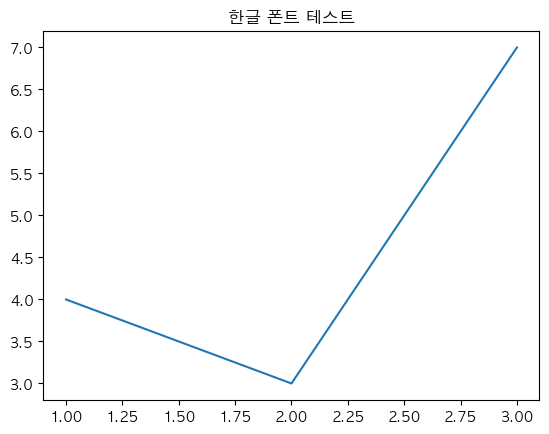

In [9]:
plt.plot([1, 2, 3], [4, 3, 7])
plt.title("한글 폰트 테스트")
plt.show()

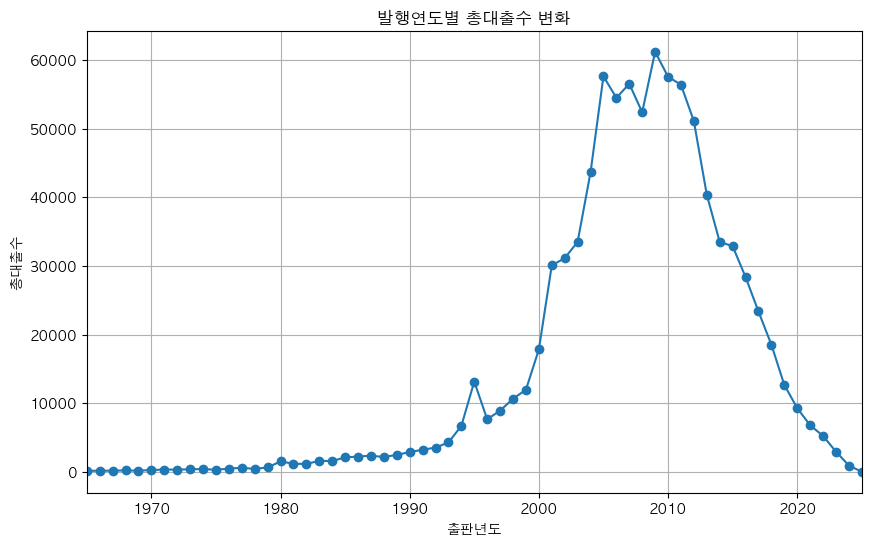

In [10]:
# 출판년도별 총대출수 합산
yearly_loans = merged_info.groupby('출판년도')['총대출수'].sum().reset_index()

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(yearly_loans['출판년도'], yearly_loans['총대출수'], marker='o', linestyle='-')

plt.title("발행연도별 총대출수 변화")
plt.xlabel("출판년도")
plt.ylabel("총대출수")
plt.xlim(left=1965,right=2025)
plt.grid()
plt.show()

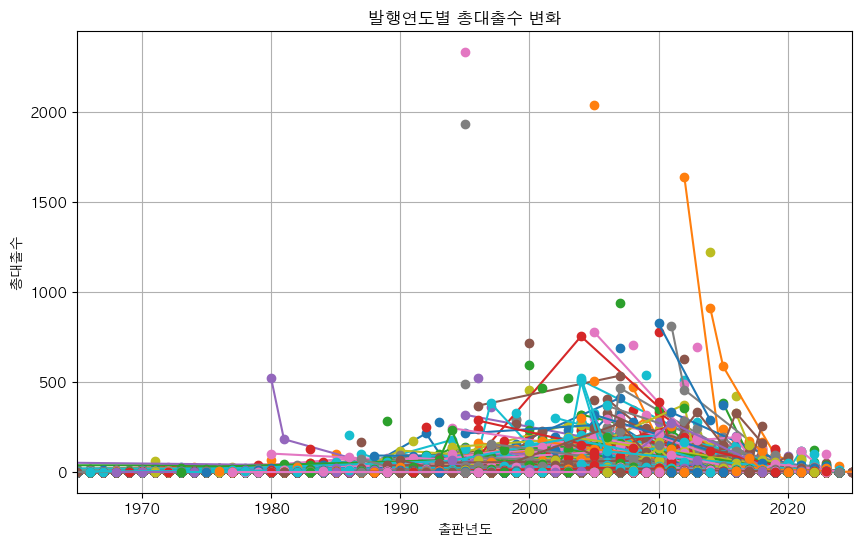

In [12]:
# 발행연도별 대출수 분석
grouped = merged_info.groupby(['서명', '출판년도'])['총대출수'].sum().reset_index()

# 시각화
plt.figure(figsize=(10, 6))
for 서명, grp in grouped.groupby('서명'):
    plt.plot(grp['출판년도'], grp['총대출수'], marker='o', label=서명)

plt.title("발행연도별 총대출수 변화")
plt.xlabel("출판년도")
plt.ylabel("총대출수")
plt.xlim(left=1965,right=2025)
plt.grid()
plt.show()

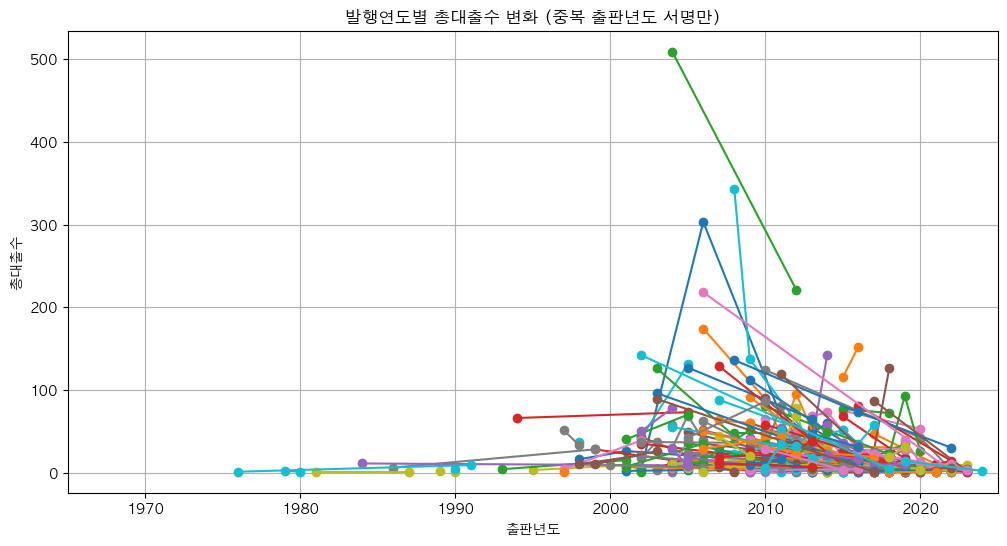

In [23]:
# 1️⃣ 발행연도가 여러 개인 서명만 필터링
book_counts = merged_info.groupby('서명')['출판년도'].nunique()
multi_edition_books = book_counts[book_counts > 1].index  # 출판년도가 2개 이상인 서명만 선택

# 2️⃣ 해당 서명만 필터링 (대출 수가 0인 데이터 제거)
filtered_data = merged_info[(merged_info['서명'].isin(multi_edition_books)) & (merged_info['총대출수'] > 0)]

# 3️⃣ 발행연도별 대출수 분석
grouped = filtered_data.groupby(['서명', '출판년도'])['총대출수'].sum().reset_index()

# 4️⃣ 서명의 개수 제한 (예: 최대 30개)
max_books = 300  # 원하는 개수로 변경 가능
unique_titles = grouped['서명'].unique()[:max_books]  # 상위 30개 서명 선택
grouped = grouped[grouped['서명'].isin(unique_titles)]

# 5️⃣ 시각화 (출판년도별 대출 수 비교)
plt.figure(figsize=(12, 6))

for 서명, grp in grouped.groupby('서명'):
    plt.plot(grp['출판년도'], grp['총대출수'], marker='o', linestyle='-', label=서명)

plt.title("발행연도별 총대출수 변화 (중복 출판년도 서명만)")
plt.xlabel("출판년도")
plt.ylabel("총대출수")
plt.xlim(left=1965,right=2025)
#plt.legend()
plt.grid()
plt.show()

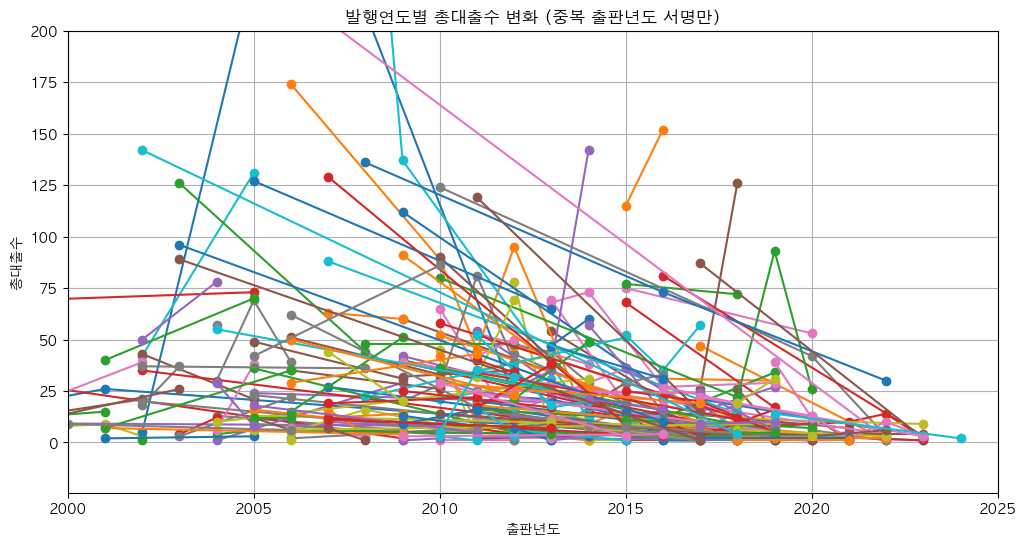

In [25]:
# 5️⃣ 시각화 (출판년도별 대출 수 비교)
plt.figure(figsize=(12, 6))

for 서명, grp in grouped.groupby('서명'):
    plt.plot(grp['출판년도'], grp['총대출수'], marker='o', linestyle='-', label=서명)

plt.title("발행연도별 총대출수 변화 (중복 출판년도 서명만)")
plt.xlabel("출판년도")
plt.ylabel("총대출수")
plt.xlim(left=2000,right=2025)
plt.ylim(top=200)
#plt.legend()
plt.grid()
plt.show()

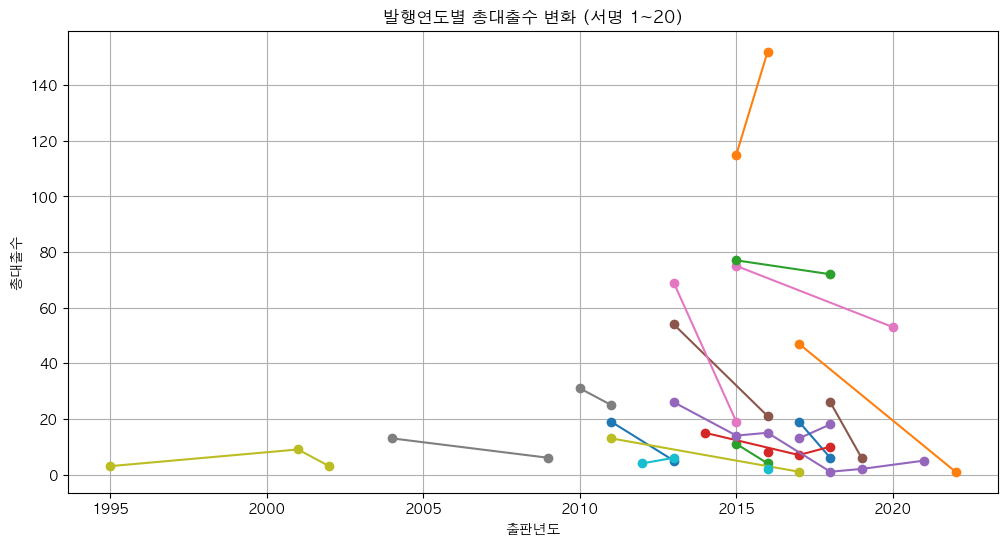

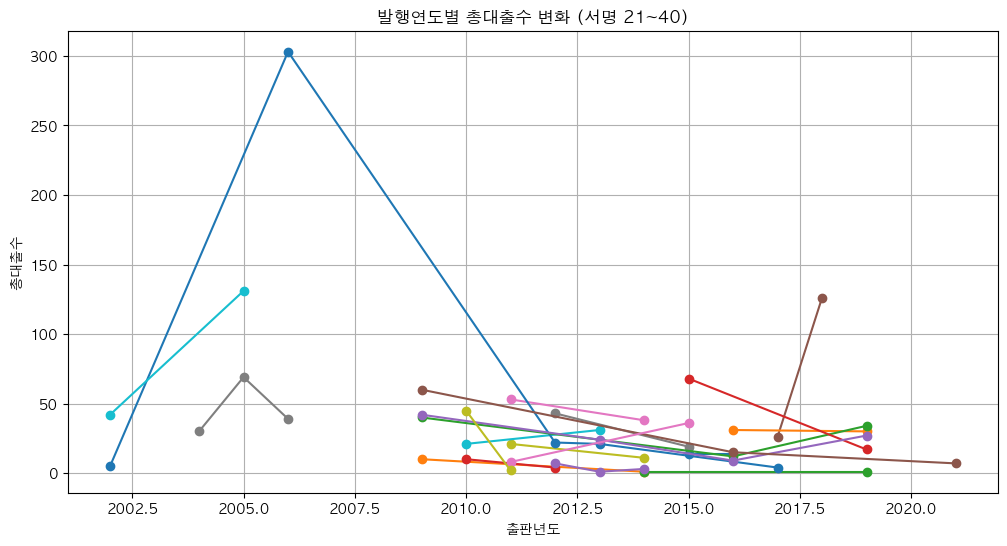

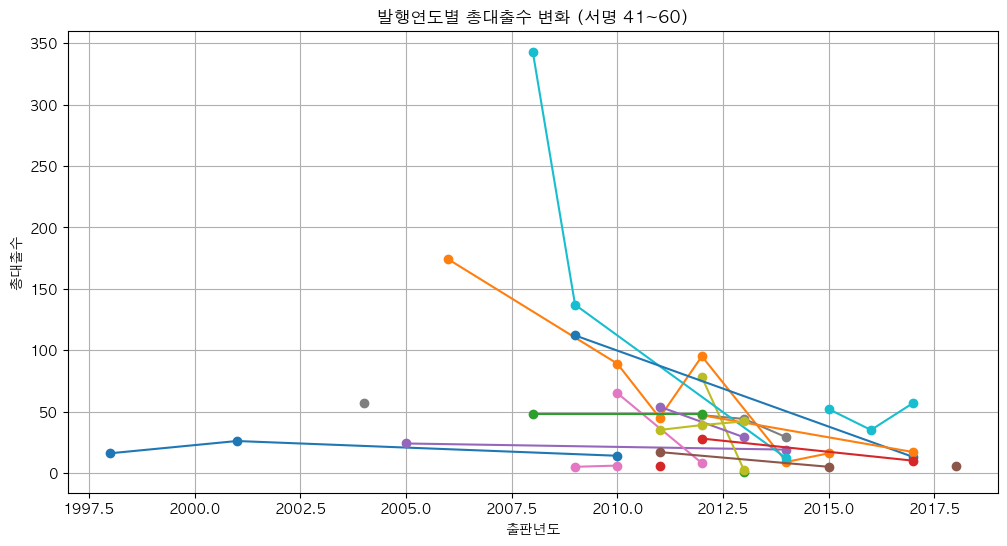

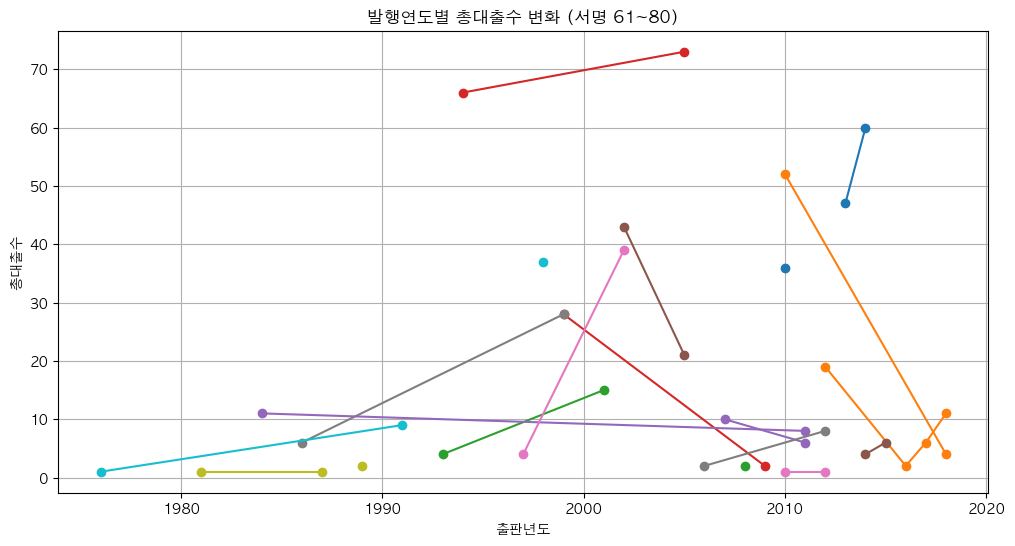

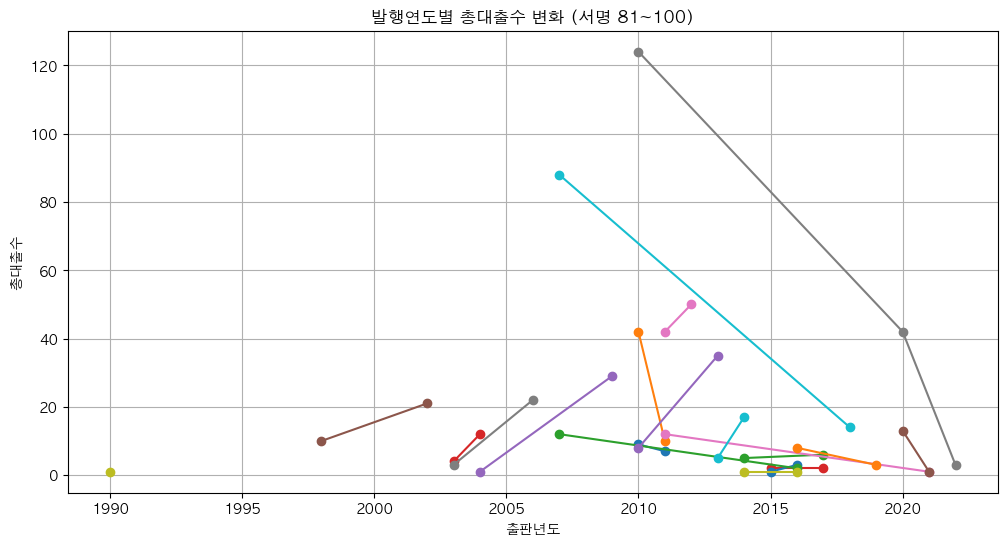

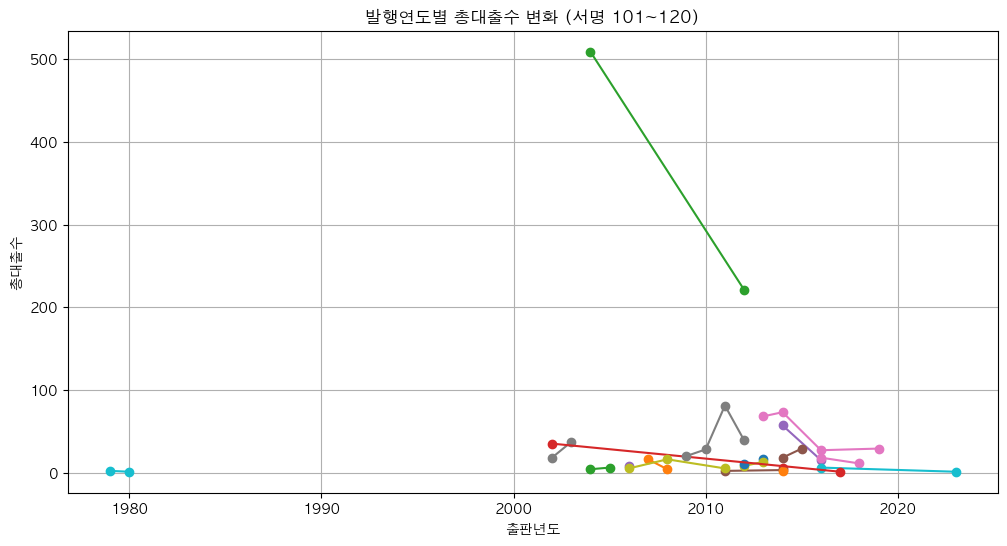

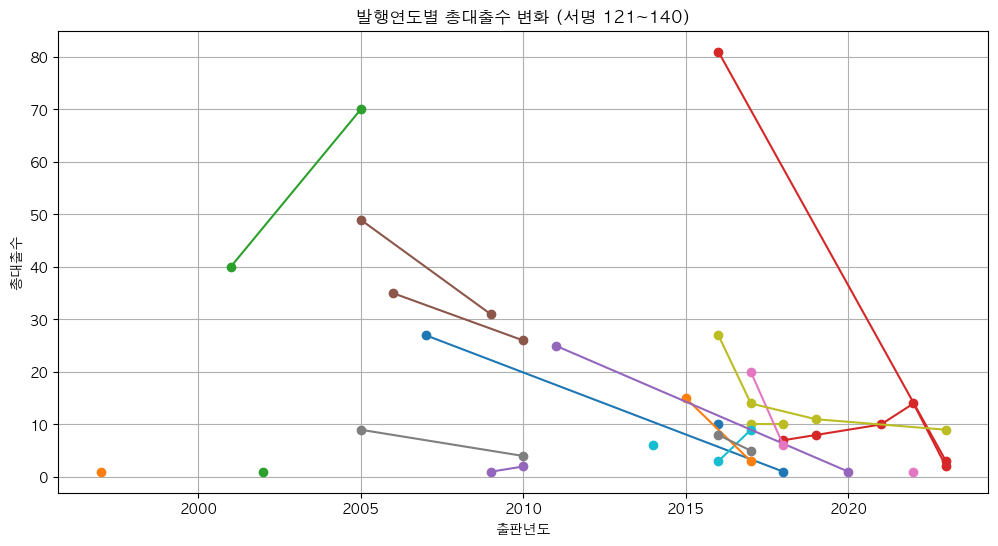

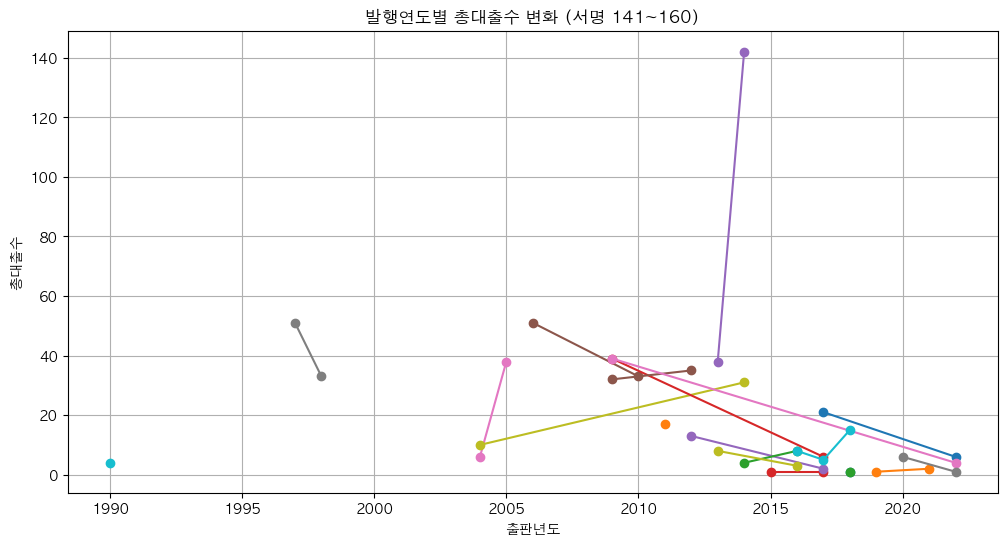

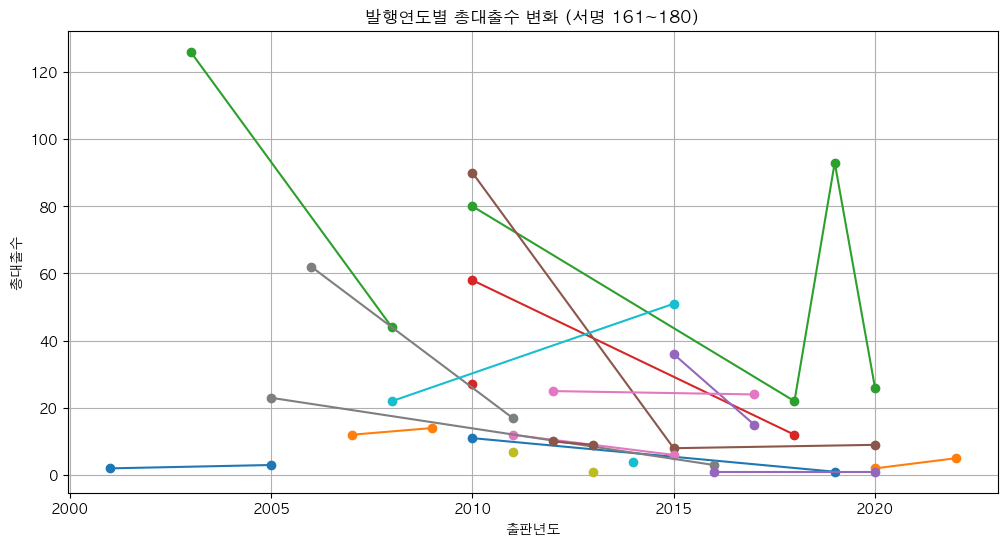

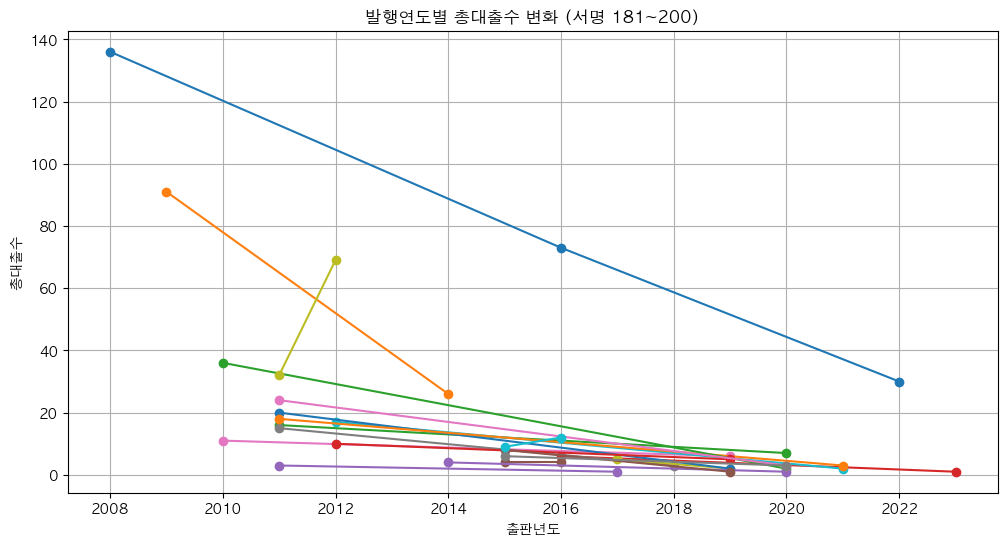

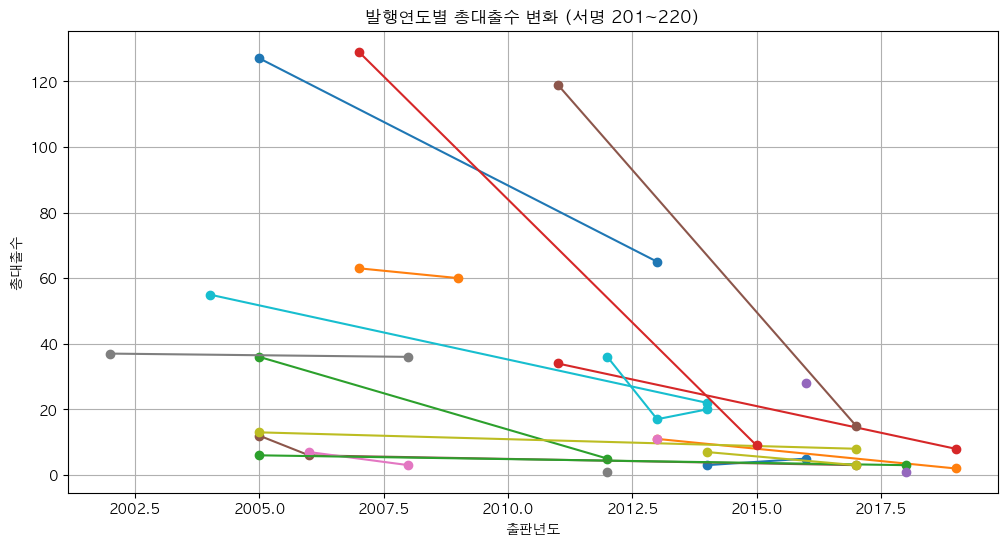

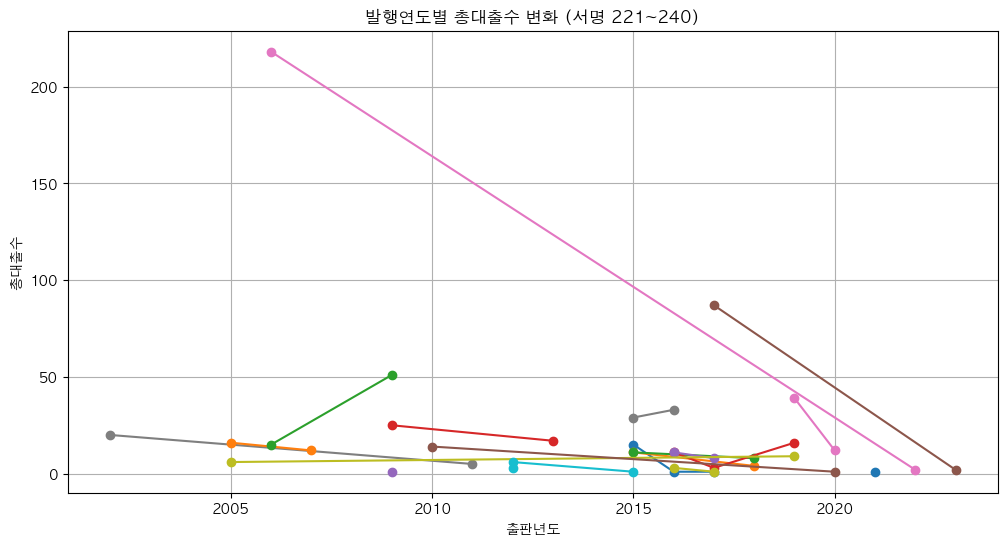

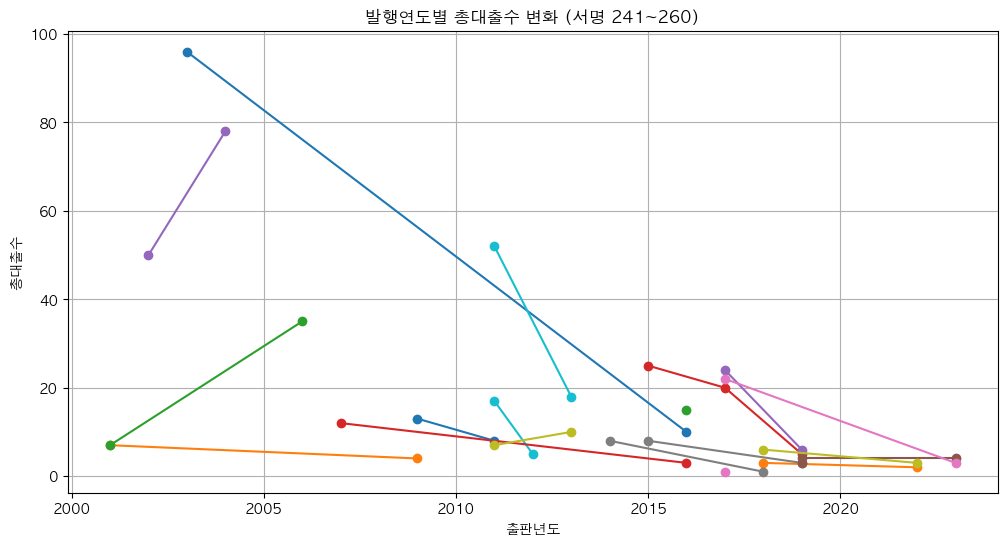

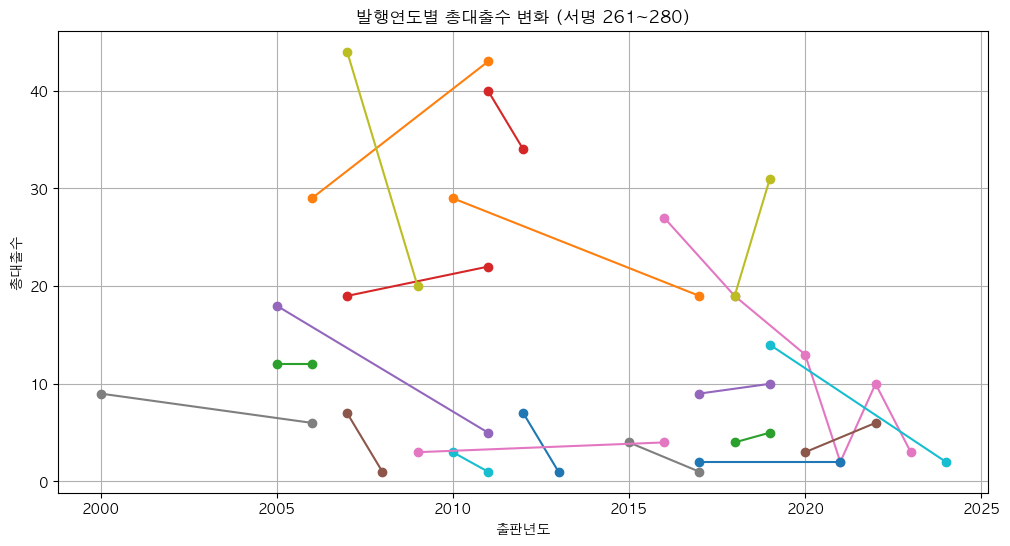

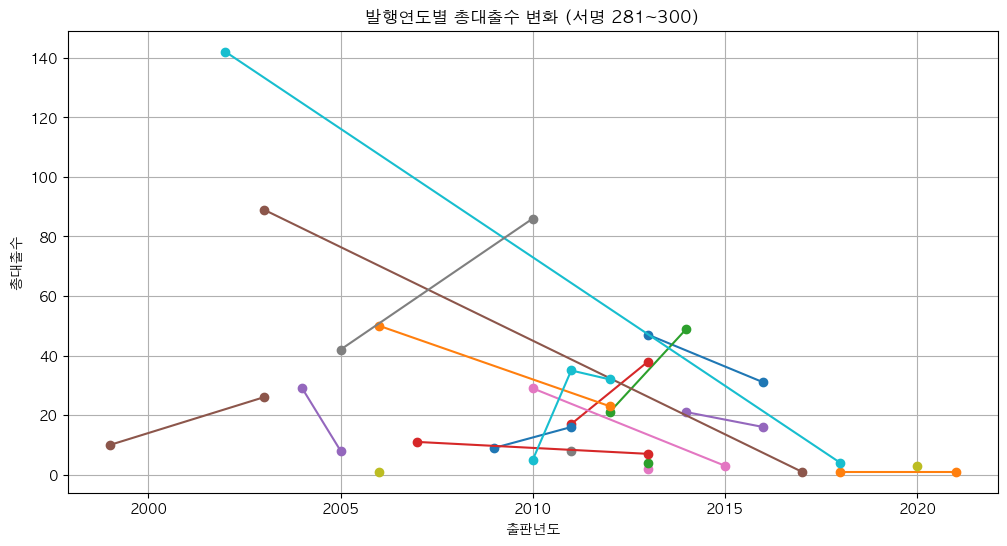

In [28]:
for i in range(0, len(unique_titles), 20):  # 20개씩 나누어 출력
    subset = unique_titles[i:i+20]
    subset_data = grouped[grouped['서명'].isin(subset)]
    plt.figure(figsize=(12, 6))
    for 서명, grp in subset_data.groupby('서명'):
        plt.plot(grp['출판년도'], grp['총대출수'], marker='o', linestyle='-', label=서명)
    plt.title(f"발행연도별 총대출수 변화 (서명 {i+1}~{i+20})")
    plt.xlabel("출판년도")
    plt.ylabel("총대출수")
    #plt.legend()
    plt.grid()

    plt.show()